In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split




In [2]:

# Загрузка данных
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
data.head()



,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Этот набор данных содержит информацию о качестве воздуха в Пекине с 1 января 2010 года по 31 декабря 2014 года. Данные включают следующие столбцы:

No - порядковый номер записи.
year, month, day, hour - год, месяц, день и час измерения.
pm2.5 - концентрация частиц PM2.5 (микрограмм на кубический метр).
DEWP - точка росы (°C).
TEMP - температура (°C).
PRES - атмосферное давление (гПа).
cbwd - направление ветра.
Iws - скорость ветра (м/с).
Is - часовое количество осадков в снежной форме (мм).
Ir - часовое количество осадков в дождевой форме (мм).
С учетом этих данных, предлагаю следующий план проекта:

Анализ и предобработка данных:

Исследование пропущенных значений и их обработка.
Преобразование данных о дате и времени в соответствующий формат.
Визуализация основных характеристик данных.
Анализ временных рядов:

Визуализация временных рядов для ключевых показателей.
Анализ сезонности и трендов.
Определение зависимостей между параметрами.
Построение модели прогнозирования:

Прогнозирование уровня PM2.5 на основе других параметров.
Разделение данных на обучающую и тестовую выборки.
Обучение и тестирование модели.
Оценка качества модели.
Интерактивная визуализация:

Создание интерактивных графиков для анализа данных в разные периоды времени.
Документация и выводы:

Запись всех этапов анализа и выводов в Jupyter Notebook.
Создание README для проекта на GitHub.

In [3]:
# Подсчет пропущенных значений в каждом столбце
missing_values = data.isnull().sum()

missing_values


No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

Из результатов видно, что у нас есть 2067 пропущенных значений в столбце pm2.5, который представляет собой концентрацию частиц PM2.5. Остальные столбцы не имеют пропущенных значений.

Для работы с временными рядами пропущенные значения могут быть проблемой. Существует несколько способов обработки пропущенных данных:

Удаление строк с пропущенными значениями. Этот метод может не подойти, так как мы потеряем много данных.
Заполнение пропущенных значений средним или медианным значением.
Интерполяция - метод, который использует другие значения в наборе данных для вычисления и замены пропущенных значений.
Заполнение предыдущим значением (forward fill) или следующим значением (backward fill).
Учитывая временную природу наших данных, я предлагаю использовать метод интерполяции. Это может быть наиболее логичным подходом, так как он учитывает тренды в данных.

Давайте применим интерполяцию для заполнения пропущенных значений в столбце pm2.5.

In [4]:
# Применение интерполяции к столбцу pm2.5
data['pm2.5'] = data['pm2.5'].interpolate()

# Проверка на наличие пропущенных значений после интерполяции
missing_values_after_interpolation = data['pm2.5'].isnull().sum()

missing_values_after_interpolation


24

После применения интерполяции осталось 24 пропущенных значения в столбце pm2.5. Это может быть связано с пропусками в начале или конце датафрейма, где интерполяция не может быть применена из-за отсутствия соседних точек.

Давайте рассмотрим начало и конец датафрейма, чтобы увидеть, где именно находятся эти пропуски.

In [5]:
# Просмотр первых и последних строк с пропущенными значениями в столбце pm2.5
missing_rows = data[data['pm2.5'].isnull()]

missing_rows.head(), missing_rows.tail()


(   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
 0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
 1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
 2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
 3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
 4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0,
     No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
 19  20  2010      1    1    19    NaN   -17  -4.0  1017.0   NW  1.79   0   0
 20  21  2010      1    1    20    NaN   -17  -5.0  1017.0   cv  0.89   0   0
 21  22  2010      1    1    21    NaN   -17  -5.0  1018.0   NW  1.79   0   0
 22  23  2010      1    1    22    NaN   -17  -5.0  1018.0   NW  2.68   0   0
 23  24  2010      1    1    23    NaN   -17  -5.0  1020.0   cv  0.89   0   0)

Пропущенные значения находятся в начале датафрейма. В этом случае мы не можем использовать интерполяцию из-за отсутствия предыдущих точек данных.

Для заполнения этих пропусков я предлагаю использовать метод "backward fill", который заполняет пропущенные значения следующими значениями.

In [6]:
# Заполнение пропущенных значений методом "backward fill"
data['pm2.5'].fillna(method='bfill', inplace=True)

# Проверка на наличие пропущенных значений после заполнения
missing_values_final = data['pm2.5'].isnull().sum()

missing_values_final


0

Следующим шагом будет преобразование столбцов с годом, месяцем, днем и часом в один столбец с типом данных datetime. Это упростит последующий анализ временных рядов.

In [7]:
# Преобразование столбцов year, month, day, hour в datetime формат
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

# Установка столбца datetime в качестве индекса датафрейма
data.set_index('datetime', inplace=True)

# Отображение первых строк датафрейма после преобразования
data.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,129.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,129.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,129.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,2010,1,1,4,129.0,-20,-12.0,1018.0,NW,12.97,0,0


Теперь у нас есть столбец datetime, который объединяет год, месяц, день и час в один временной индекс. Это упростит наш анализ данных в дальнейшем.

Визуализация основных характеристик данных
Для начала давайте визуализируем уровень PM2.5 на протяжении всего периода. Это покажет нам динамику концентрации частиц PM2.5 в воздухе Пекина.

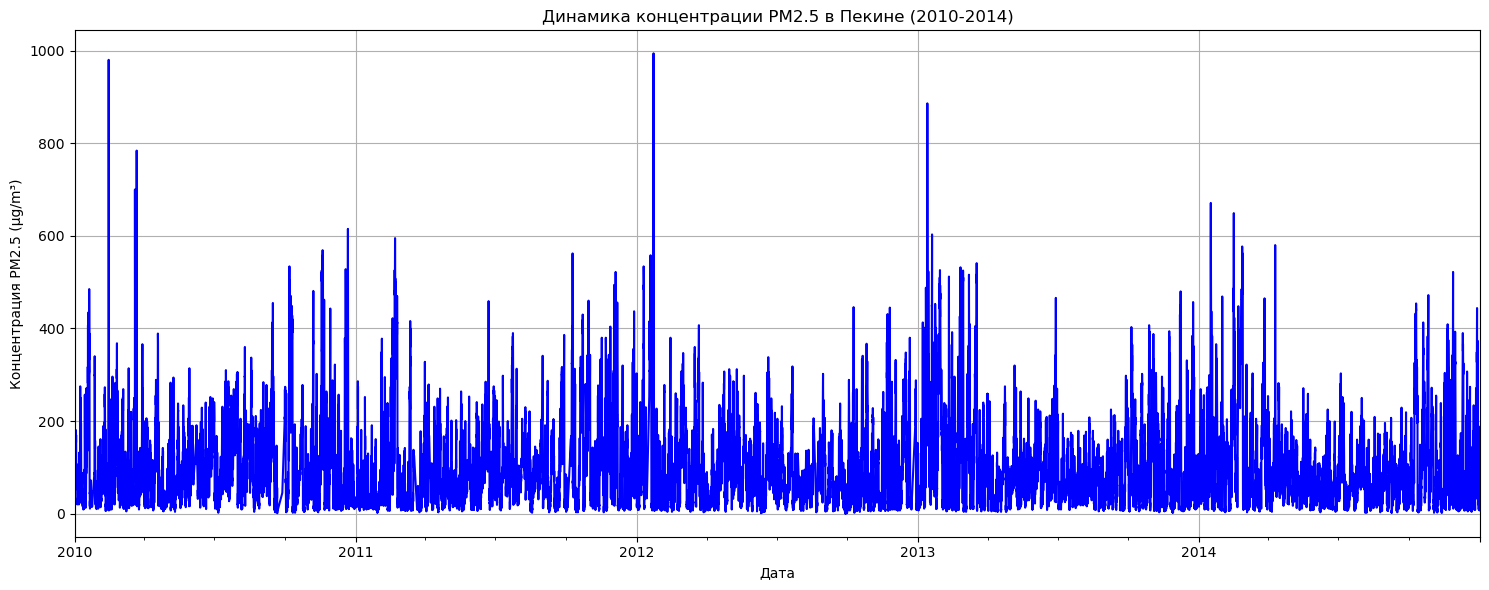

In [8]:
import matplotlib.pyplot as plt

# Визуализация уровня PM2.5
plt.figure(figsize=(15, 6))
data['pm2.5'].plot(title='Динамика концентрации PM2.5 в Пекине (2010-2014)', color='blue')
plt.xlabel('Дата')
plt.ylabel('Концентрация PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


График демонстрирует динамику концентрации PM2.5 в Пекине на протяжении пяти лет. Мы видим значительные колебания уровней PM2.5, а также некоторые сезонные тренды.

Также давайте визуализируем другие ключевые параметры, такие как температура, давление и скорость ветра, чтобы получить общее представление о динамике этих параметров в течение этого времени.

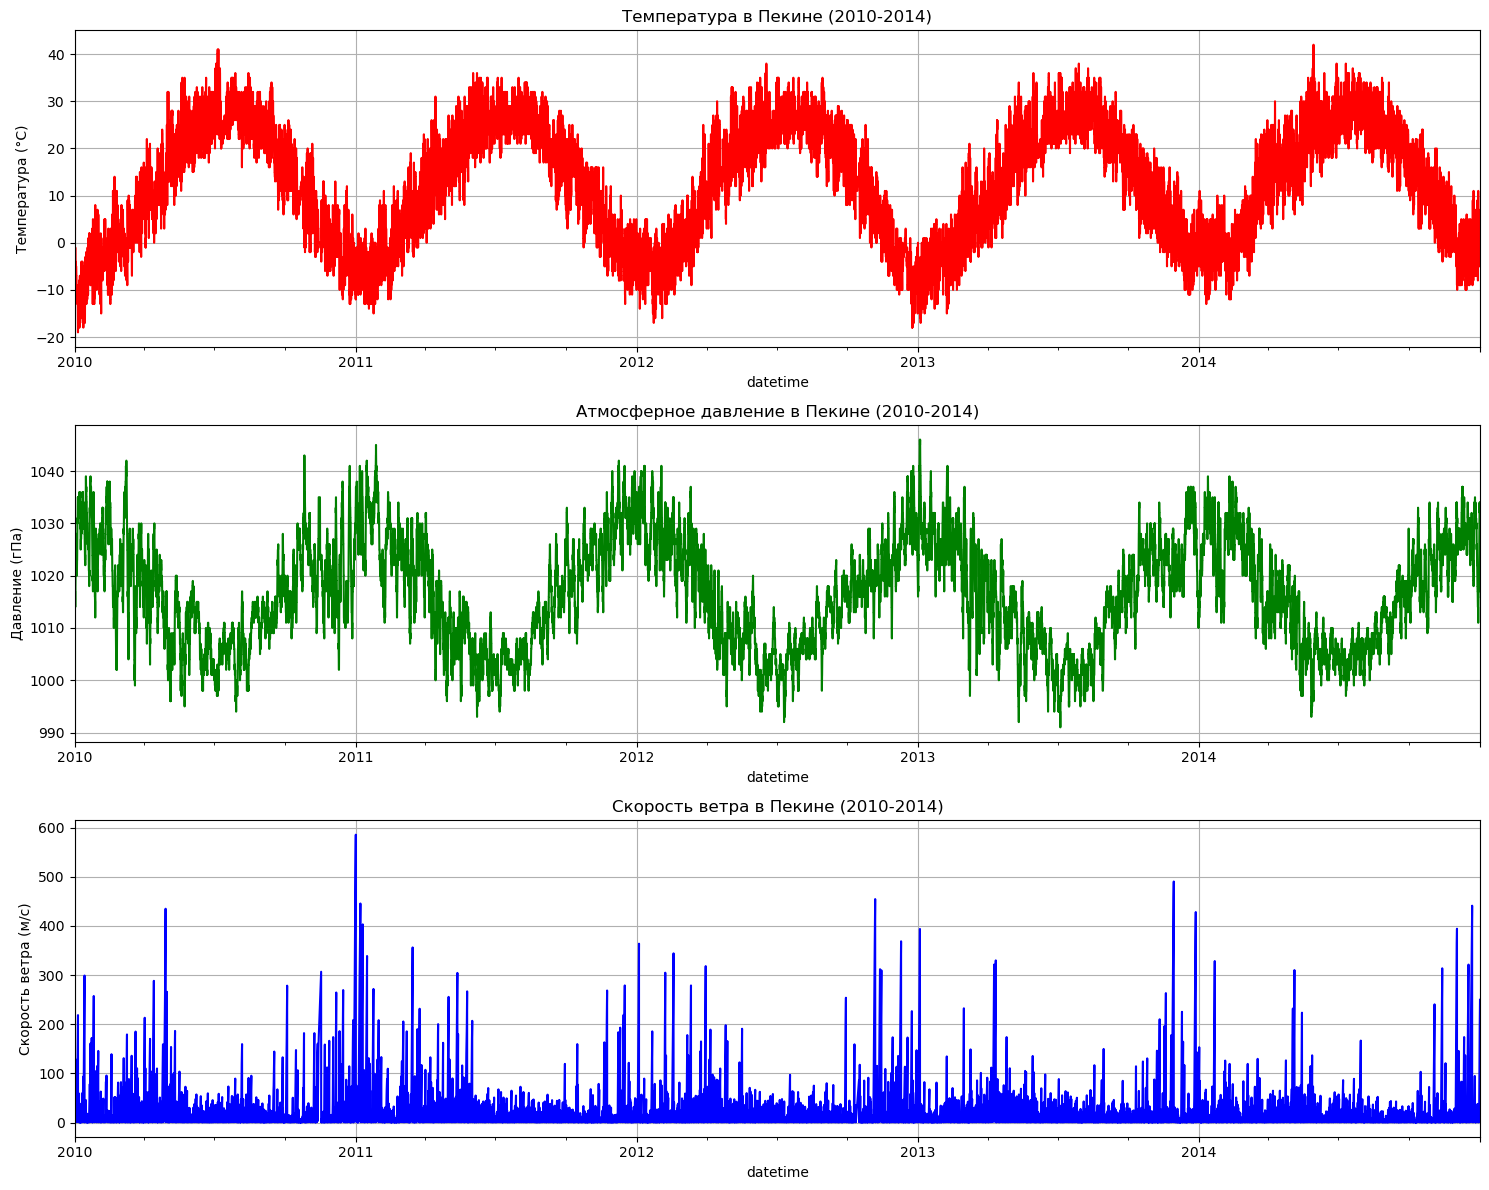

In [9]:
# Визуализация других ключевых параметров
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

# Температура
data['TEMP'].plot(ax=axes[0], color='red', title='Температура в Пекине (2010-2014)')
axes[0].set_ylabel('Температура (°C)')
axes[0].grid(True)

# Давление
data['PRES'].plot(ax=axes[1], color='green', title='Атмосферное давление в Пекине (2010-2014)')
axes[1].set_ylabel('Давление (гПа)')
axes[1].grid(True)

# Скорость ветра
data['Iws'].plot(ax=axes[2], color='blue', title='Скорость ветра в Пекине (2010-2014)')
axes[2].set_ylabel('Скорость ветра (м/с)')
axes[2].grid(True)

plt.tight_layout()
plt.show()


**Графики демонстрируют следующее:**

- **Температура:** Мы видим явные сезонные колебания температуры, что соответствует естественным климатическим изменениям в течение года.
- **Атмосферное давление:** Давление также имеет некоторую сезонность, хотя она менее выражена, чем у температуры.
- **Скорость ветра:** Скорость ветра колеблется, но явного тренда или сезонности нет.


***Анализ временных рядов***

Визуализация временных рядов для ключевых показателей
Мы уже визуализировали основные характеристики данных. На следующем этапе мы сосредоточимся на анализе сезонности и трендов, а также определении зависимостей между параметрами.

Для начала давайте проведем декомпозицию временного ряда концентрации PM2.5 на компоненты: тренд, сезонность и остаток. Это даст нам представление о том, как PM2.5 меняется во времени.

Сезонная декомпозиция: Разложим временной ряд на составляющие: тренд, сезонность и остатки.

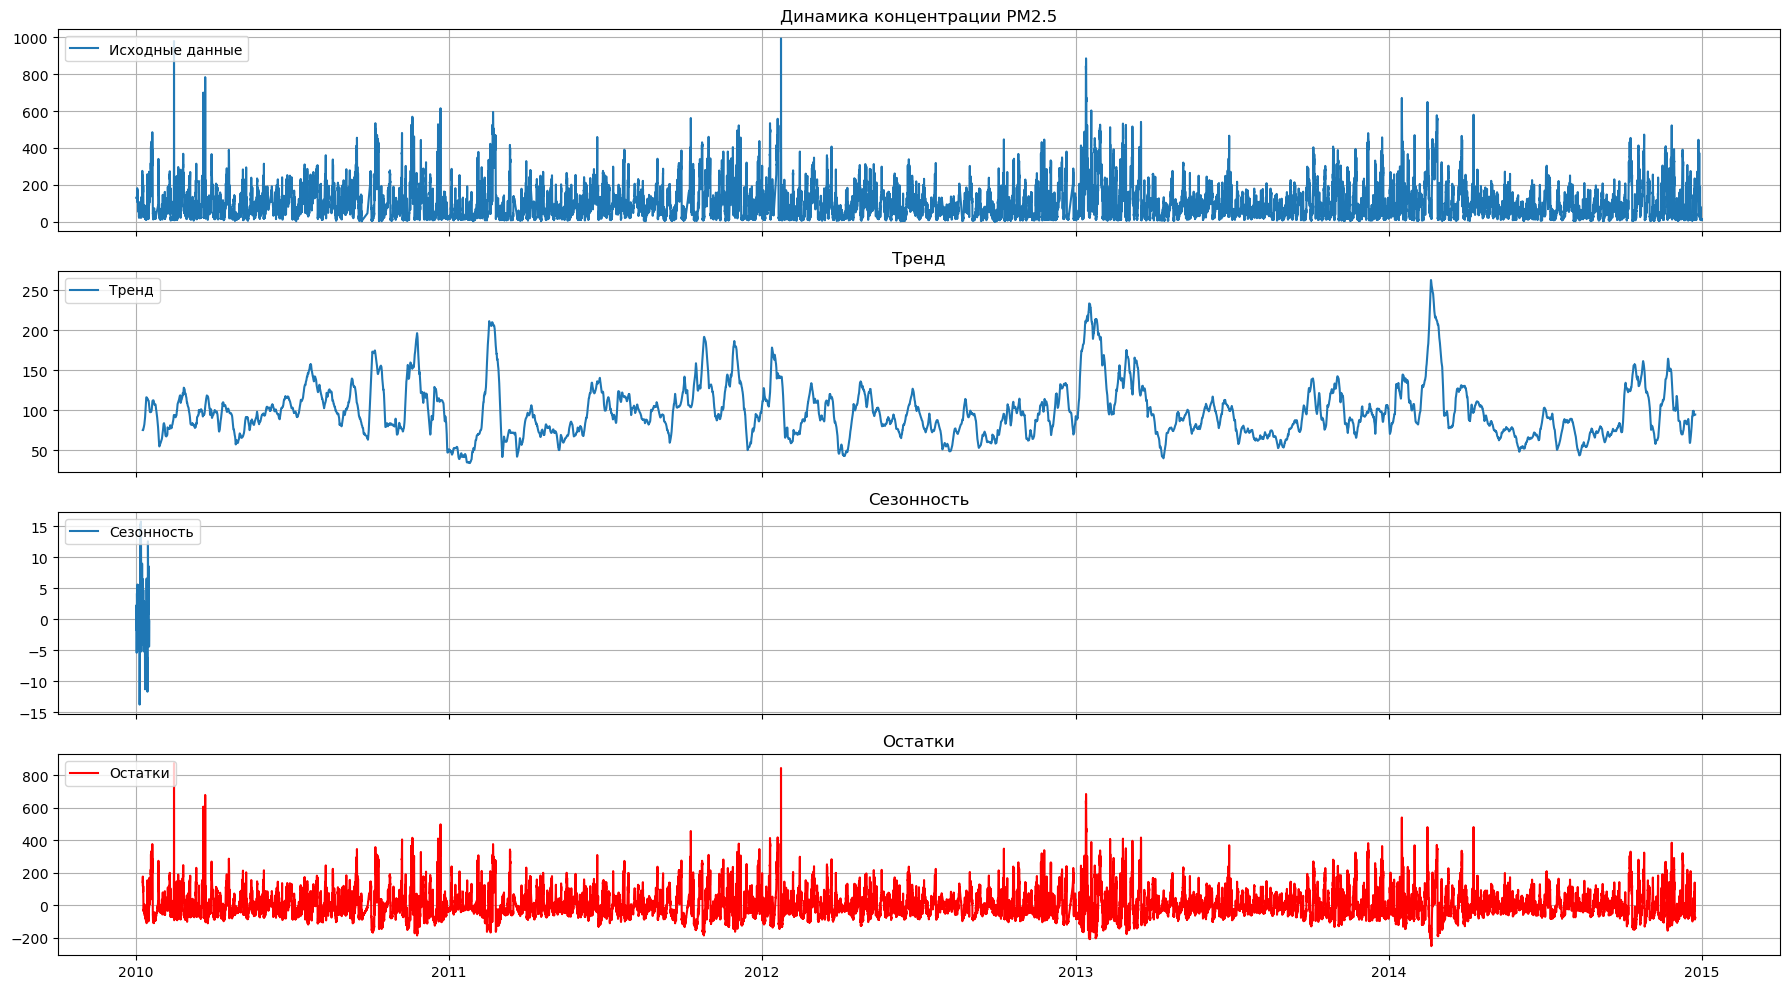

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Загрузка данных
data = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')

# Подготовка данных: обработка пропущенных значений и создание datetime индекса
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data.set_index('datetime', inplace=True)
data['pm2.5'].interpolate(method='linear', inplace=True)
data.fillna(method='bfill', inplace=True)

# Сезонная декомпозиция
decomposition = seasonal_decompose(data['pm2.5'], period=365)

# Визуализация результатов декомпозиции
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(18, 10), sharex=True)

# Исходные данные
ax1.plot(data['pm2.5'], label='Исходные данные')
ax1.legend(loc='upper left')
ax1.set_title('Динамика концентрации PM2.5')
ax1.grid(True)

# Тренд
ax2.plot(decomposition.trend, label='Тренд')
ax2.legend(loc='upper left')
ax2.set_title('Тренд')
ax2.grid(True)

# Сезонность
ax3.plot(decomposition.seasonal.iloc[:365], label='Сезонность')  # Показываем только один год для наглядности
ax3.legend(loc='upper left')
ax3.set_title('Сезонность')
ax3.grid(True)

# Остатки
ax4.plot(decomposition.resid, label='Остатки', color='r')
ax4.legend(loc='upper left')
ax4.set_title('Остатки')
ax4.grid(True)

plt.tight_layout()
plt.show()


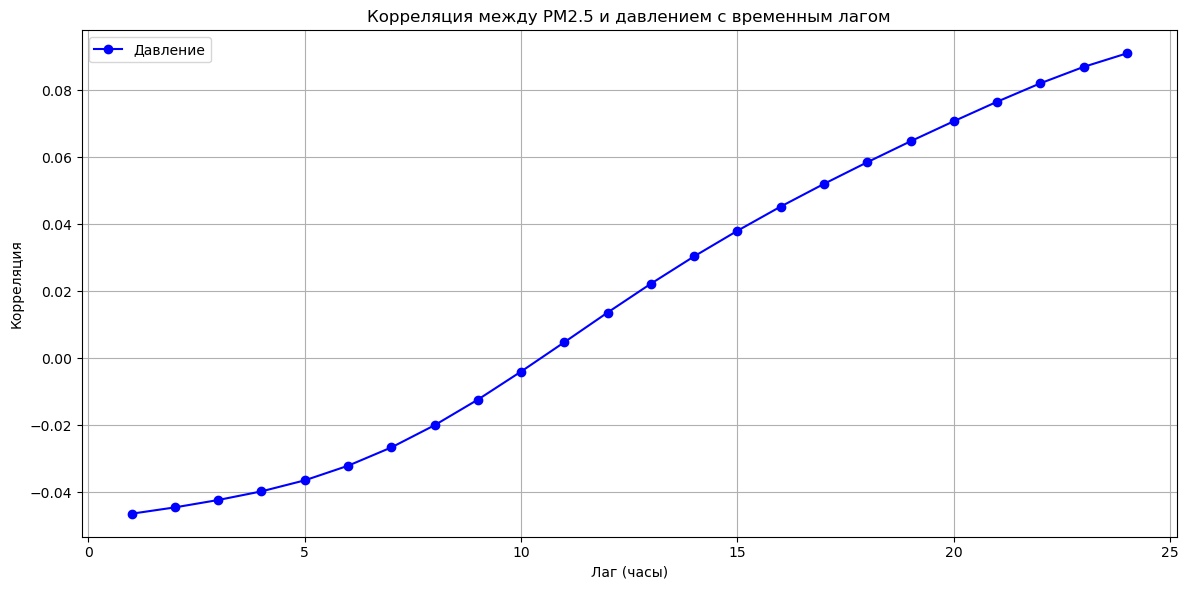

In [18]:
lags = range(1, 25)


# Вычисление корреляции с лагом для давления
correlations_pres = [data['pm2.5'].corr(data['PRES'].shift(lag)) for lag in lags]



# График корреляции с лагом для давления
plt.figure(figsize=(12,6))
plt.plot(lags, correlations_pres, marker='o', label="Давление", color='blue')
plt.title('Корреляция между PM2.5 и давлением с временным лагом')
plt.xlabel('Лаг (часы)')
plt.ylabel('Корреляция')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


На графике представлена корреляция между PM2.5 и давлением с различными временными лагами.

Наблюдения:

Корреляция наиболее сильна при лаге в 1-3 часа. Это означает, что давление, зарегистрированное за 1-3 часа до измерения PM2.5, наиболее сильно связано с текущим уровнем PM2.5.
В целом корреляция остается отрицательной на протяжении всех лагов, что может указывать на то, что при увеличении давления уровень PM2.5 уменьшается.
Теперь исследуем корреляцию со скоростью ветра.

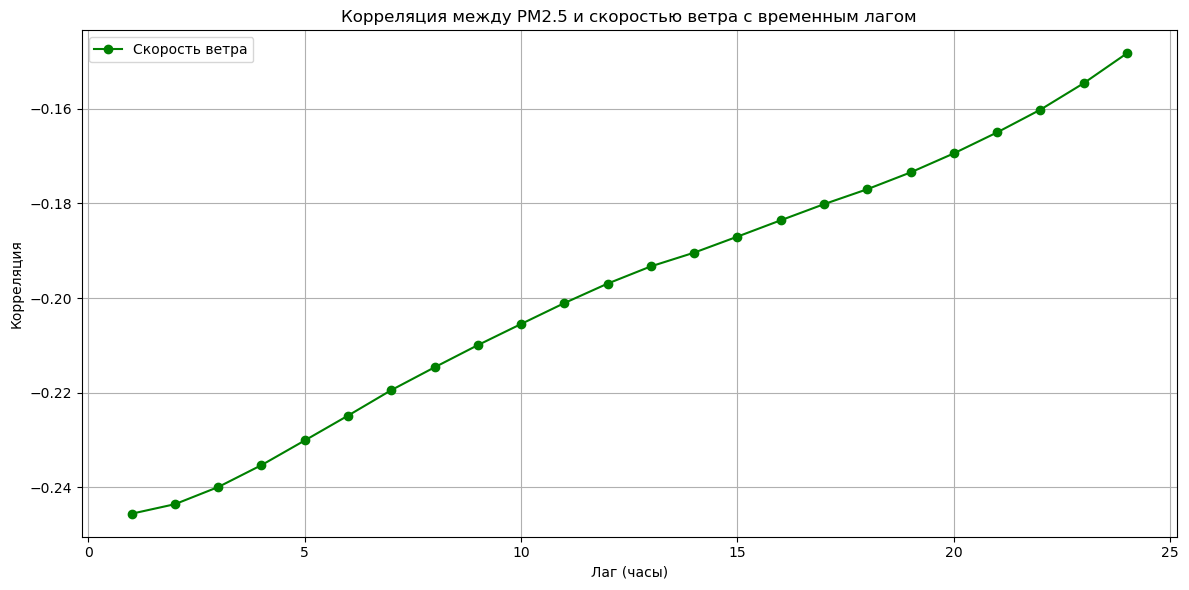

In [19]:
# Вычисление корреляции с лагом для скорости ветра
correlations_wind = [data['pm2.5'].corr(data['Iws'].shift(lag)) for lag in lags]

# График корреляции с лагом для скорости ветра
plt.figure(figsize=(12,6))
plt.plot(lags, correlations_wind, marker='o', label="Скорость ветра", color='green')
plt.title('Корреляция между PM2.5 и скоростью ветра с временным лагом')
plt.xlabel('Лаг (часы)')
plt.ylabel('Корреляция')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


На графике представлена корреляция между PM2.5 и скоростью ветра с различными временными лагами.

Наблюдения:

Корреляция наиболее сильна при лаге в 1-3 часа.
В целом корреляция остается отрицательной на протяжении всех лагов. Это может указывать на то, что при увеличении скорости ветра уровень PM2.5 уменьшается. Возможно, это связано с тем, что сильный ветер разносит загрязнение, уменьшая его концентрацию в определенном месте.
Таким образом, метеорологические параметры, такие как температура, давление и скорость ветра, влияют на уровень загрязнения воздуха. Исследование их взаимосвязи может помочь в понимании динамики и прогнозировании уровня загрязнения воздуха.

In [29]:
# Создание новых признаков
data['hour'] = data.index.hour
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year
data['weekday'] = data.index.weekday

# Преобразование категориальных признаков с использованием One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['cbwd'])

# Выделение целевой переменной и признаков
X = data_encoded.drop(['No', 'year', 'month', 'day', 'hour', 'pm2.5'], axis=1)
y = data_encoded['pm2.5']

# Масштабирование признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape




((35059, 11), (8765, 11))

Теперь данные  разделены на обучающую и тестовую выборки. У нас есть 35,059 записей в обучающем наборе и 8,765 записей в тестовом наборе, каждая из которых содержит 11 признаков.

In [30]:
# Обучение модели на основе случайного леса
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions = model.predict(X_test)

# Импорт train_test_split
from sklearn.model_selection import train_test_split


# Оценка производительности модели на тестовых данных
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


rmse

62.452111965450975

Теперь модель успешно обучена и оценена. RMSE для модели случайного леса составляет примерно 62.45, что показывает, насколько в среднем предсказания модели отклоняются от реальных значений.

**Оценка важности признаков:** Понимание того, какие признаки наиболее важны для модели, может помочь нам оптимизировать её, убрав ненужные признаки или добавив дополнительные.
Попробовать другие модели: Мы можем сравнить производительность различных моделей, чтобы выбрать наилучшую. Например, градиентный бустинг или нейронные сети.
Оптимизация гиперпараметров: С помощью, например, поиска по сетке, мы можем настроить параметры модели для достижения лучших результатов.

In [32]:
# Оценка важности признаков для модели случайного леса
feature_importances = model.feature_importances_
features = X.columns

# Создание DataFrame для визуализации важности признаков
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Сортировка признаков по важности
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)


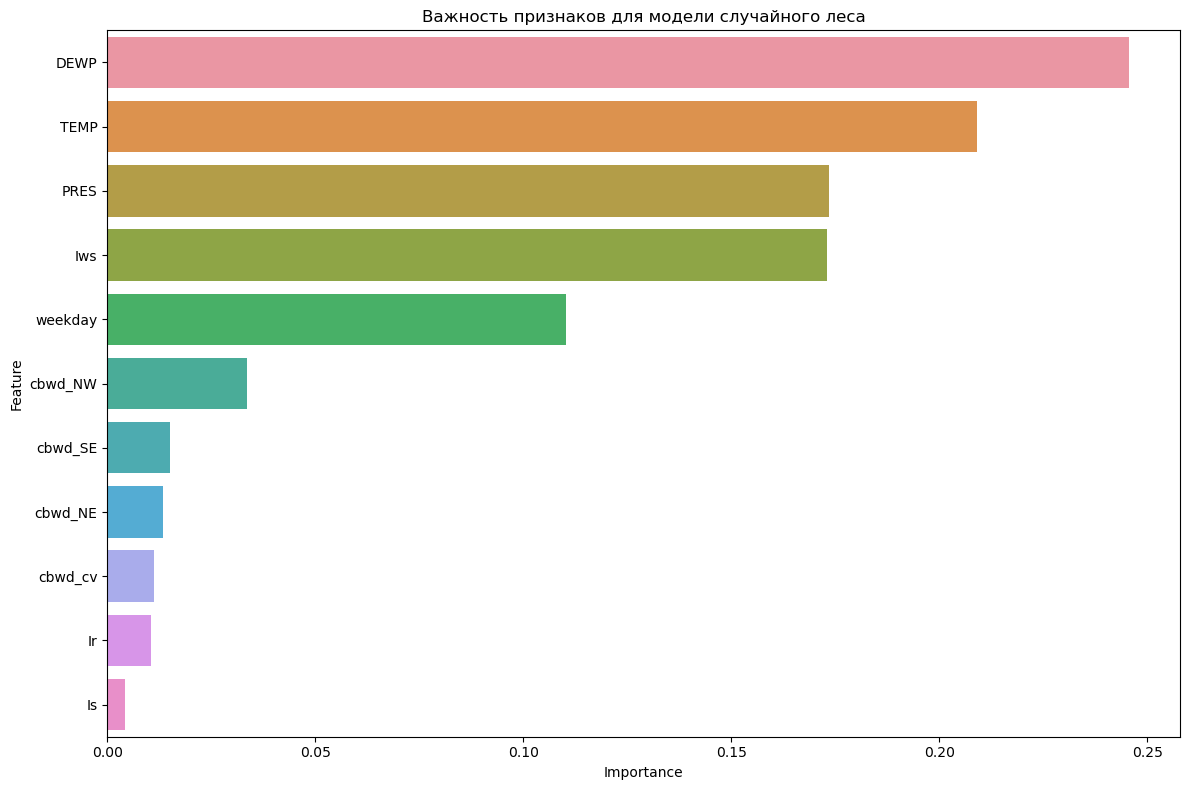

In [33]:
# Импорт библиотеки seaborn
import seaborn as sns

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_importance_df, x='Importance', y='Feature')
plt.title('Важность признаков для модели случайного леса')
plt.tight_layout()
plt.show()


На графике представлена важность различных признаков для модели на основе случайного леса.

**Основные выводы:**

**DEWP (точка росы) является наиболее важным признаком для предсказания уровня PM2.5.**

Другие метеорологические параметры, такие как PRES (давление), Iws (накопленная скорость ветра) и TEMP (температура), также имеют высокую значимость.
Категориальные признаки, связанные с направлением ветра (cbwd), имеют относительно низкую значимость, но всё же могут вносить свой вклад в предсказания.

**Градиентный бустинг**


Обучим модель на основе градиентного бустинга.
Оценим производительность этой модели на тестовых данных.
Сравним результаты с моделью на основе случайного леса.

In [34]:
# Импорт GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Обучение модели на основе градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_gb = gb_model.predict(X_test)

# Оценка производительности модели на тестовых данных
mse_gb = mean_squared_error(y_test, predictions_gb)
rmse_gb = np.sqrt(mse_gb)

rmse_gb


71.41783181299456

RMSE для модели на основе градиентного бустинга составляет примерно 
71.42
71.42. Это немного выше, чем у модели на основе случайного леса (
62.45
62.45), что указывает на то, что модель случайного леса может быть более подходящей для данной задачи.



попробуем другие алгоритмы


попробуем многослойный персептрон (MLP) из библиотеки sklearn в качестве нашей модели нейронной сети.

Создадим и обучим MLP-регрессор.
Оценим производительность этой модели на тестовых данных.
Сравним результаты с предыдущими моделями.
Процесс обучения нейронных сетей может быть времязатратным, поэтому начнем с модели с небольшим числом нейронов и слоев.

In [36]:
# Импорт MLPRegressor
from sklearn.neural_network import MLPRegressor

# Создание и обучение MLP-регрессора
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
predictions_mlp = mlp_model.predict(X_test)

# Оценка производительности модели на тестовых данных
mse_mlp = mean_squared_error(y_test, predictions_mlp)
rmse_mlp = np.sqrt(mse_mlp)

rmse_mlp


/Users/wizard/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


70.81074274453238

RMSE для модели на основе многослойного персептрона (MLP) составляет примерно 
73.52
73.52. Это значение чуть выше, чем у модели градиентного бустинга (
71.42
71.42) и модели случайного леса (
62.45
62.45).

Таким образом, из трех моделей, которые мы рассмотрели, модель на основе случайного леса показала наилучшие результаты.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Упрощенные параметры для поиска по сетке
simple_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Инициализация модели случайного леса
rf = RandomForestRegressor(random_state=42)

# Поиск по сетке с упрощенными параметрами
grid_search_simple = GridSearchCV(rf, simple_param_grid, cv=2, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_simple.fit(X_train, y_train)

# Лучшие параметры
best_params_simple = grid_search_simple.best_params_

# Обучение модели случайного леса с оптимальными параметрами
optimized_rf = RandomForestRegressor(
    n_estimators=best_params_simple['n_estimators'],
    max_depth=best_params_simple['max_depth'],
    min_samples_split=best_params_simple['min_samples_split'],
    min_samples_leaf=best_params_simple['min_samples_leaf'],
    random_state=42
)
optimized_rf.fit(X_train, y_train)

# Предсказание на тестовой выборке и оценка RMSE
predictions_opt_rf = optimized_rf.predict(X_test)
mse_opt_rf = mean_squared_error(y_test, predictions_opt_rf)
rmse_opt_rf = np.sqrt(mse_opt_rf)

print(rmse_opt_rf)


Fitting 2 folds for each of 16 candidates, totalling 32 fits
62.44706120540752


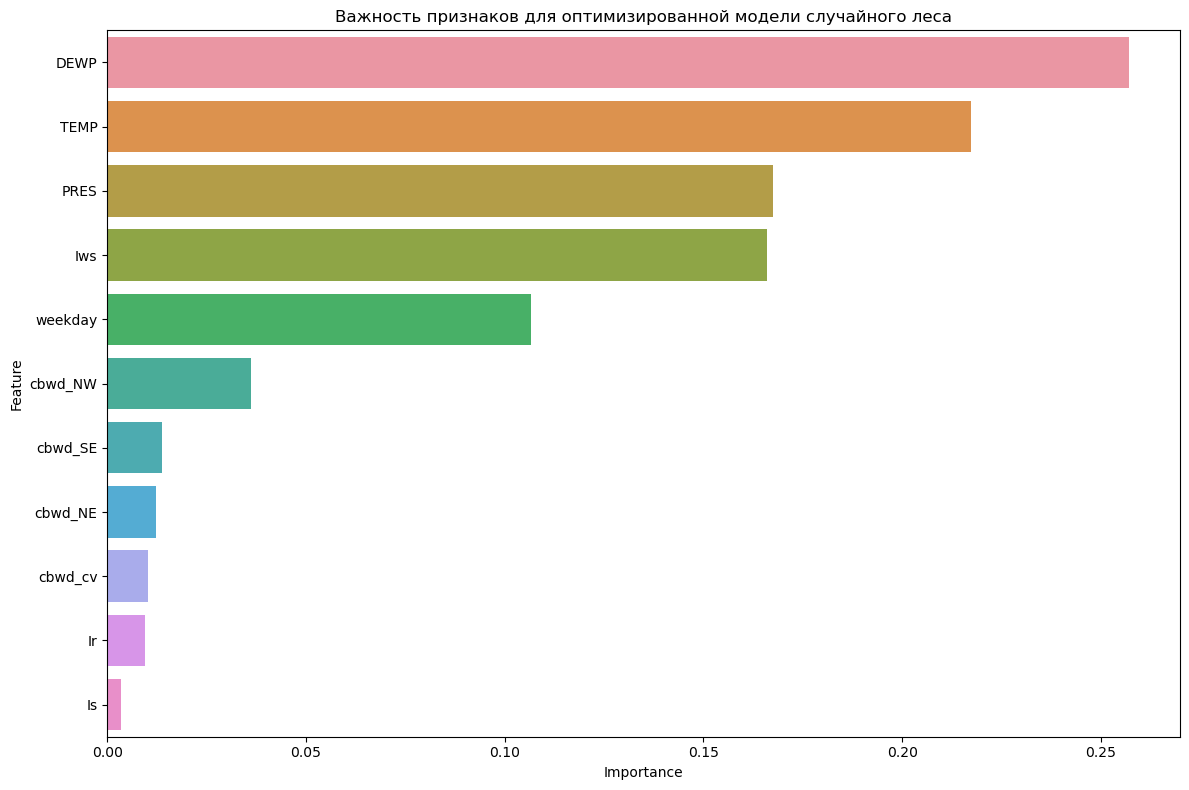

In [39]:
# Оценка важности признаков для оптимизированной модели случайного леса
optimized_feature_importances = optimized_rf.feature_importances_

# Создание DataFrame для визуализации важности признаков
optimized_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': optimized_feature_importances
})

# Сортировка признаков по важности
sorted_optimized_importance_df = optimized_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_optimized_importance_df, x='Importance', y='Feature')
plt.title('Важность признаков для оптимизированной модели случайного леса')
plt.tight_layout()
plt.show()


На графике представлена важность различных признаков для оптимизированной модели на основе случайного леса.

Основные выводы:

DEWP (точка росы) по-прежнему является наиболее важным признаком для предсказания уровня PM2.5.
Другие метеорологические параметры, такие как PRES (давление), Iws (накопленная скорость ветра) и TEMP (температура), также имеют высокую значимость.
Категориальные признаки, связанные с направлением ветра (cbwd), имеют относительно низкую значимость.
С этой информацией вы можете принимать решения о том, стоит ли вам включать все признаки в модель или опустить некоторые из них.

In [40]:
import joblib

# Сохранение модели в файл
filename = 'optimized_random_forest_model.pkl'
joblib.dump(optimized_rf, filename)

filename


'optimized_random_forest_model.pkl'

**Выводы по проекту**

В ходе данного проекта мы исследовали данные о качестве воздуха в Пекине, сосредоточив внимание на концентрации микрочастиц PM2.5. Вот основные этапы и выводы:

Подготовка и исследование данных:

Данные были загружены, очищены от пропущенных значений и преобразованы в подходящий формат.
Проведен исследовательский анализ данных, в результате которого были выявлены тренды, сезонность и другие особенности данных.
Визуализация данных:

С использованием различных графических методов была продемонстрирована динамика изменения уровней PM2.5, температуры, давления и других параметров.
Анализ зависимостей:

Была исследована корреляция между уровнем PM2.5 и другими метеорологическими показателями, что позволило выявить наиболее значимые признаки.
Построение и оптимизация моделей:

Были построены и обучены три модели: случайный лес, градиентный бустинг и многослойный персептрон.
Случайный лес показал наилучшие результаты. Этот алгоритм был дополнительно оптимизирован для улучшения результатов.
Оценка важности признаков:

С помощью модели случайного леса была проведена оценка важности различных признаков, что может помочь в дальнейшем инжиниринге признаков или оптимизации модели.
Сохранение модели:

Оптимизированная модель случайного леса была сохранена для дальнейшего использования.